In [36]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

In [5]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [66]:
dataset = pd.read_csv('./data/heart.csv', sep=",")
targets = dataset['target']            
data = dataset.drop('target', axis=1)
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [67]:
print("\nThe number of rows per target category:\n{}".format(dataset.groupby('target').count()['sex']))
print("\nThis is the mean values for each column in each category:\n")
print(dataset.groupby('target').min())


The number of rows per target category:
target
0    138
1    165
Name: sex, dtype: int64

This is the mean values for each column in each category:

        age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal
target                                                                                      
0        35    0   0       100   131    0        0       71      0      0.0      0   0     0
1        29    0   0        94   126    0        0       96      0      0.0      0   0     0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x136C35F0>,
      dtype=object)

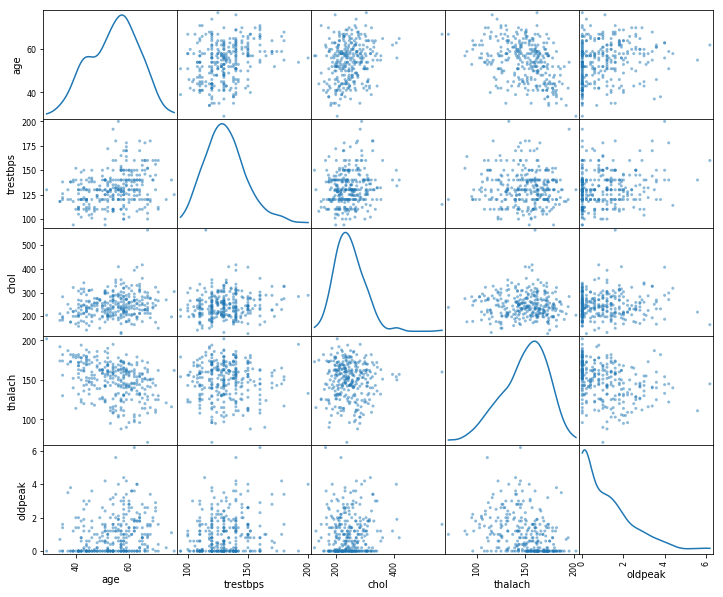

In [68]:
# SCATTER PLOT MATRIX 
pd.plotting.scatter_matrix(dataset[['age','trestbps', 'chol', 'thalach', 'oldpeak']], figsize=(12, 10), diagonal='kde')

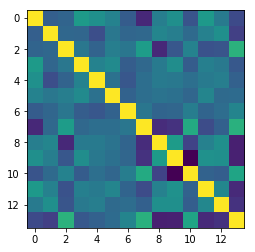

In [69]:
# HEATMAP
corr = dataset.loc[:,:].corr()
plt.imshow(corr)
plt.show()

In [82]:
kf = KFold(5, shuffle=True)

In [87]:
def get_kmeans_avg(classifier):
    means = []
    for train, test in kf.split(dataset):
        classifier.fit(data.loc[train], targets.loc[train])
        prediction = classifier.predict(data.loc[test])
        cur_mean = np.mean(prediction == targets.loc[test])
        means.append(cur_mean)
    return np.mean(means)

In [89]:
for n in range(1, 16):
    classifier = KNeighborsClassifier(n_neighbors=n)
    mean = get_kmeans_avg(classifier)
    print("Num neighbours: {}\t\tMeans: {}".format(n, mean))

Num neighbours: 1		Means: 0.5906557377049181
Num neighbours: 2		Means: 0.5643715846994535
Num neighbours: 3		Means: 0.6203278688524589
Num neighbours: 4		Means: 0.660327868852459
Num neighbours: 5		Means: 0.6601092896174864
Num neighbours: 6		Means: 0.626775956284153
Num neighbours: 7		Means: 0.673224043715847
Num neighbours: 8		Means: 0.6170491803278689
Num neighbours: 9		Means: 0.6468306010928961
Num neighbours: 10		Means: 0.6272131147540984
Num neighbours: 11		Means: 0.643551912568306
Num neighbours: 12		Means: 0.6269945355191257
Num neighbours: 13		Means: 0.6501639344262294
Num neighbours: 14		Means: 0.6469398907103825
Num neighbours: 15		Means: 0.6499453551912568
